In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# 測定に使用したデータ

In [3]:
HV_original_data_left = {
    'HV_D1_L': [4.5, 29.6, 18.0, 12.8, 14.3, 15.7, 6.1, 11.5, 14.2, 18.1, 12.5, 16.8, 17.8, 5.5],
    'HV_D2_L': [2.4, 29.5, 15.3, 9.8, 13.1, 16.0, 6.9, 11.5, 13.7, 18.1, 14.2, 13.0, 18.2, 7.6],
    'SegPCA_L': [0.2, 26.3, 16.5, 9.1, 11.9, 12.2, 6.6, 11.2, 10.6, 17.6, 13.7, 12.9, 18.9, 10.3],
}

HV_original_data_right = {
    'HV_D1_R': [4.2, 29.5, 20.1, 11.5, 9.2, 18.9, 9.5, 9.7, 15.0, 22.3, 13.0, 18.8, 12.0, 8.7],
    'HV_D2_R': [4.1, 28.0, 17.2, 8.4, 5.7, 16.3, 6.7, 10.9, 14.9, 19.8, 11.7, 15.7, 10.5, 12.1],
    'SegPCA_R': [1.3, 25.8, 18.4, 7, 5.1, 14.9, 7.2, 9.9, 11.6, 20.2, 11.4, 14.7, 12.7, 9]
}

M1M5_original_data_left = {
    'M1M5_D1_L':[26.15, 40.781, 26.377, 29.49, 30.639, 28.259, 29.585, 29.675, 28.217, 32.251, 30.488, 34.87, 35.212, 26.634],
    'M1M5_D2_L': [21.408, 40.608, 23.794, 24.54, 28.133, 25.809, 31.521, 29.829, 28.185, 31.023, 29.117, 31.558, 33.517, 29.081],
    'SegPCA_L': [20.90, 36.40, 23.90, 20.50, 25.20, 23.60, 29.80, 27.40, 25.70, 29.00, 26.60, 29.70, 29.30, 17.90]
}
M1M5_original_data_right = {
    'M1M5_D1_R':  [26.528, 37.671, 28.924, 28.528, 30.256, 27.926, 27.401, 29.616, 28.212, 31.25, 30.84, 32.828, 36.327, 27.336],
    'M1M5_D2_R':  [24.026, 38.249, 28.655, 26.294, 28.776, 26.976, 31.316, 31.039, 29.267, 30.403, 29.526, 30.189, 34.146, 28.129],
    'SegPCA_R' : [22.60, 34.50, 26.40, 22.50, 26.50, 23.80, 29.80, 27.80, 26.10, 30.10, 26.80, 27.80, 32.60, 24.30]
}


# 測定に使用した関数

In [14]:
# コサイン類似度
def cos_sim(vector1,vector2):
    simirality = np.dot(vector1,vector2) / (np.sqrt(np.dot(vector1,vector1)) * np.sqrt(np.dot(vector2,vector2)))
    return simirality

# ベクトル間の角度算出
def angle_between_vectors(vector1, vector2):
    if len(vector1) != len(vector2):
        raise ValueError("ベクトルの次元は同じである必要があります。")

    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    cosine_similarity = dot_product / (norm_vector1 * norm_vector2)
    angle_rad = np.arccos(np.clip(cosine_similarity, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)

    return angle_deg
  
# ユークリッド距離
def euclidean_distance(vector1,vector2):
    if len(vector1) != len(vector2):
        print("ベクトルの次元を同じにしてください")
    distance = np.linalg.norm(vector1 - vector2)
    return distance

def process_pca(data1, data2, x_label, y_label, title, save_path, mode):
    data = np.array([data1, data2]).T
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    # 主成分軸ベクトル
    loadings = pca.components_

    # 45°直線のベクトル
    angle = np.deg2rad(45)
    vector45 = np.array([np.cos(angle), np.sin(angle)])
    
    plt.scatter(data1, data2)
    for i, (x, y) in enumerate(zip(data1, data2)):
        plt.annotate(str(i + 1), (x + 0.3, y + 0.3), fontsize=10)

    # 第一主成分軸を直線で描画
    mean_d1, mean_d2 = np.mean(data1), np.mean(data2)
    plt.plot([mean_d1 - loadings[0, 0] * 40, mean_d1 + loadings[0, 0] * 40],
             [mean_d2 - loadings[0, 1] * 40, mean_d2 + loadings[0, 1] * 40], color='r', label=f'PC1')
    
    # コサイン類似度を算出
    similarity = cos_sim(vector1=loadings[0], vector2=vector45)
    print(f"コサイン類似度 : {similarity}")

    # ベクトル間の角度差
    angle_rad = angle_between_vectors(vector1=loadings[0],vector2=vector45)
    print(f"ベクトル間の角度差 : {angle_rad}")
    
    # ユークリッド距離
    distance = euclidean_distance(vector1=loadings[0],vector2=vector45)
    print(f"ユークリッド距離 : {distance}")
    
    # 主成分軸の分散を出力
    print(f"第一主成分軸の分散 : {pca.explained_variance_[0]}")
    print(f"第二主成分軸の分散 : {pca.explained_variance_[1]}")
    
    if mode == "HV":
        min_plt = 0
        max_plt = 35
    else:
        min_plt = 15
        max_plt = 40
        
    plt.xlim(min_plt, max_plt)
    plt.ylim(min_plt, max_plt)
    plt.xlabel(f"{x_label}")
    plt.ylabel(f"{y_label}")
    plt.plot([0,45], [0, 45], linestyle='--', color='black')
    plt.legend()
    plt.title(f"{title}")
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()


コサイン類似度 : 0.9999937672113213
ベクトル間の角度差 : 0.20229216251616847
ユークリッド距離 : 0.003530662453089763
第一主成分軸の分散 : 80.3818892667176
第二主成分軸の分散 : 1.5506931508648523


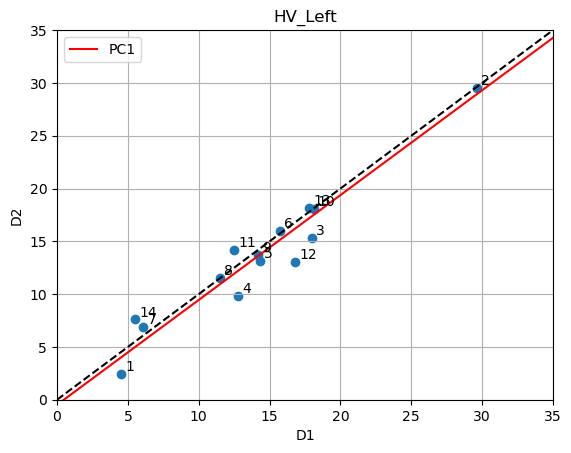

コサイン類似度 : 0.9995844323960837
ベクトル間の角度差 : 1.6518610520415362
ユークリッド距離 : 0.02882941566928602
第一主成分軸の分散 : 74.93237731565844
第二主成分軸の分散 : 3.436633673352602


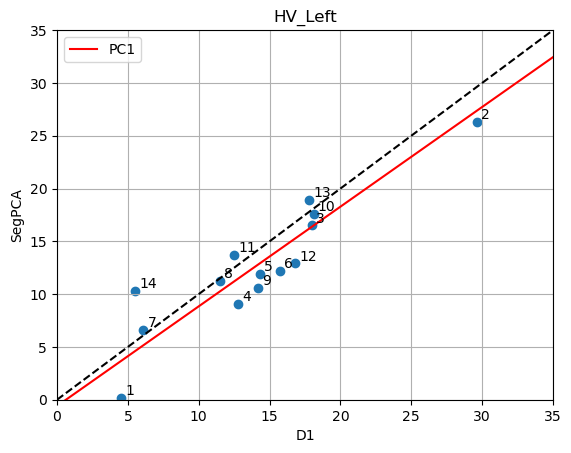

コサイン類似度 : 0.9997151594164682
ベクトル間の角度差 : 1.3675678199049128
ユークリッド距離 : 0.02386799461755668
第一主成分軸の分散 : 76.2453114647945
第二主成分軸の分散 : 1.5670511725681195


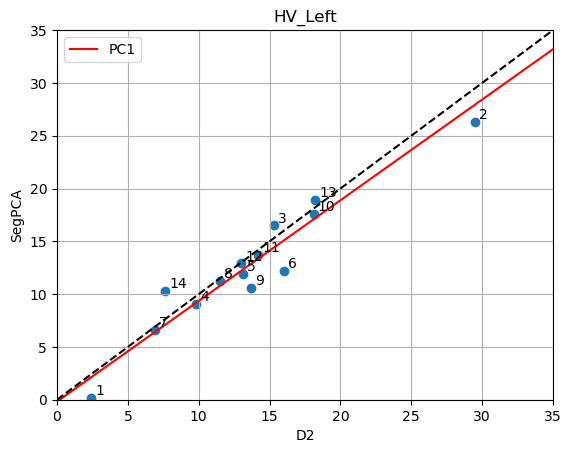

In [15]:
HV_D1_L = HV_original_data_left["HV_D1_L"]
HV_D2_L = HV_original_data_left["HV_D2_L"]
SegPCA_L = HV_original_data_left["SegPCA_L"]
process_pca(HV_D1_L,HV_D2_L,x_label="D1",y_label="D2",title="HV_Left",save_path = "assets/HV_D1_D2_L.png",mode = "HV")
process_pca(HV_D1_L,SegPCA_L,x_label="D1",y_label="SegPCA",title="HV_Left",save_path = "assets/HV_D1_SegPCA_L.png",mode = "HV")
process_pca(HV_D2_L,SegPCA_L,x_label="D2",y_label="SegPCA",title="HV_Left",save_path = "assets/HV_D2_SegPCA_L.png",mode = "HV")


コサイン類似度 : 0.9995307667527141
ベクトル間の角度差 : 1.7552904983882278
ユークリッド距離 : 0.030634400509425924
第一主成分軸の分散 : 80.47664632662934
第二主成分軸の分散 : 5.490881145898116


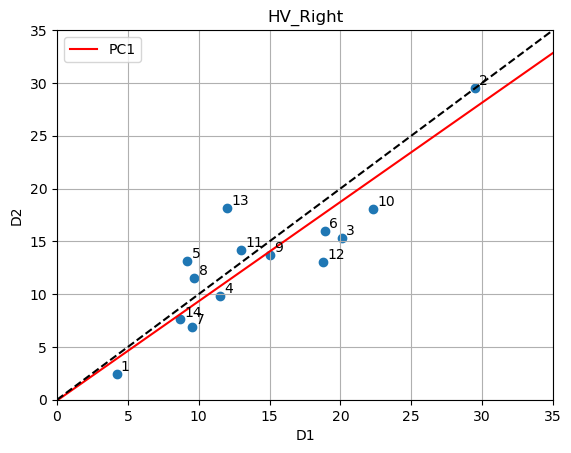

コサイン類似度 : 0.9997375542267685
ベクトル間の角度差 : 1.3127043375720717
ユークリッド距離 : 0.02291051170234457
第一主成分軸の分散 : 85.20908865230041
第二主成分軸の分散 : 1.516405853194107


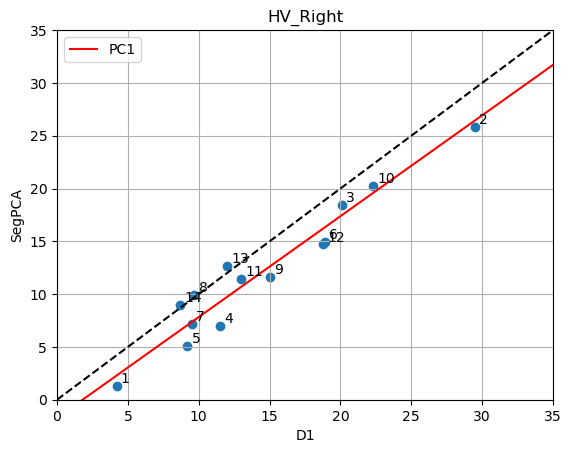

コサイン類似度 : 0.9999440310482675
ベクトル間の角度差 : 0.6061962455971605
ユークリッド距離 : 0.010580071052001584
第一主成分軸の分散 : 79.90945628329072
第二主成分軸の分散 : 1.3195547057202208


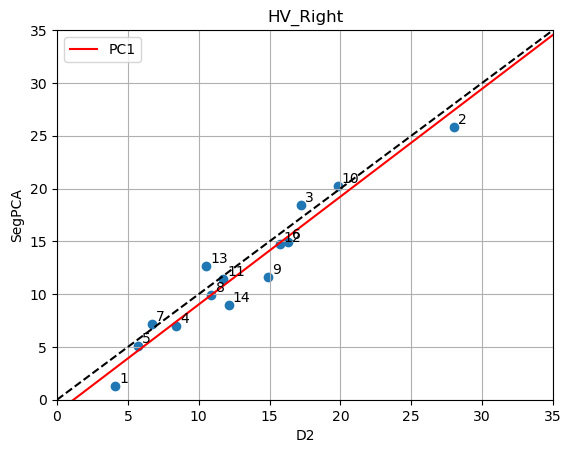

In [16]:
HV_D1_R = HV_original_data_right["HV_D1_R"]
HV_D2_R = HV_original_data_right["HV_D2_R"]
SegPCA_R = HV_original_data_right["SegPCA_R"]
process_pca(HV_D1_R,HV_D2_L,x_label="D1",y_label="D2",title="HV_Right",save_path = "assets/HV_D1_D2_R.png",mode = "HV")
process_pca(HV_D1_R,SegPCA_R,x_label="D1",y_label="SegPCA",title="HV_Right",save_path = "assets/HV_D1_SegPCA_R.png",mode = "HV")
process_pca(HV_D2_R,SegPCA_R,x_label="D2",y_label="SegPCA",title="HV_Right",save_path = "assets/HV_D2_SegPCA_R.png",mode = "HV")


コサイン類似度 : 0.9964081446050618
ベクトル間の角度差 : 4.85766019420655
ユークリッド距離 : 0.08475677430079813
第一主成分軸の分散 : 36.4632329073201
第二主成分軸の分散 : 2.174566944328248


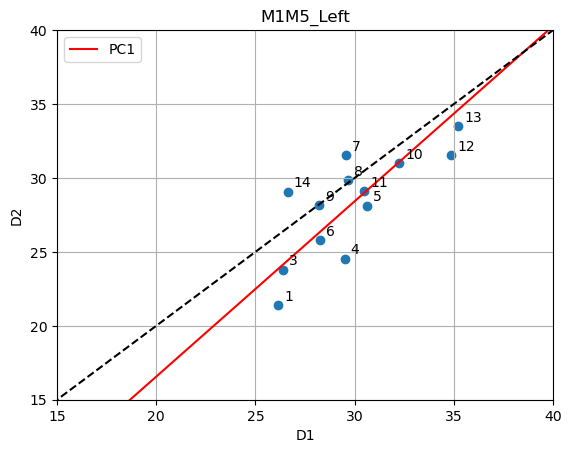

コサイン類似度 : 0.995945770946704
ベクトル間の角度差 : 5.161056430592725
ユークリッド距離 : 0.09004697722073798
第一主成分軸の分散 : 36.03624727768186
第二主成分軸の分散 : 2.7750454695708835


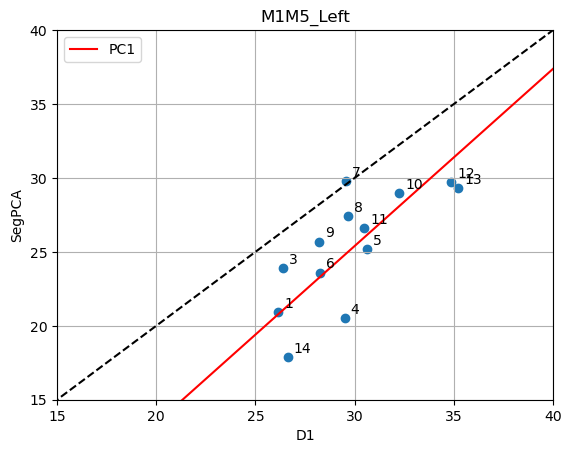

コサイン類似度 : 0.9999973257664864
ベクトル間の角度差 : 0.13250656340587186
ユークリッド距離 : 0.002312675296495363
第一主成分軸の分散 : 41.05343274039563
第二主成分軸の分散 : 3.5441732650988698


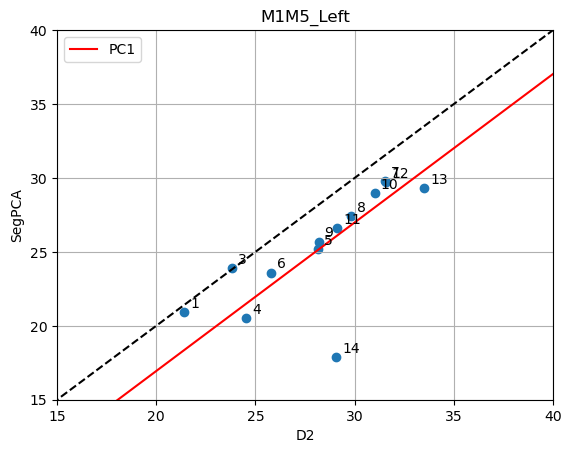

In [17]:
M1M5_D1_L = M1M5_original_data_left["M1M5_D1_L"]
M1M5_D2_L = M1M5_original_data_left["M1M5_D2_L"]
SegPCA_L = M1M5_original_data_left["SegPCA_L"]
process_pca(M1M5_D1_L,M1M5_D2_L,x_label="D1",y_label="D2",title="M1M5_Left",save_path = "assets/M1M5_D1_D2_L.png",mode = "M1M5")
process_pca(M1M5_D1_L,SegPCA_L,x_label="D1",y_label="SegPCA",title="M1M5_Left",save_path = "assets/M1M5_D1_SegPCA_L.png",mode = "M1M5")
process_pca(M1M5_D2_L,SegPCA_L,x_label="D2",y_label="SegPCA",title="M1M5_Left",save_path = "assets/M1M5_D2_SegPCA_L.png",mode = "M1M5")


コサイン類似度 : 0.9998568318519729
ベクトル間の角度差 : 0.9695406340833344
ユークリッド距離 : 0.01692147440544646
第一主成分軸の分散 : 21.270725593822625
第二主成分軸の分散 : 1.7193471204630981


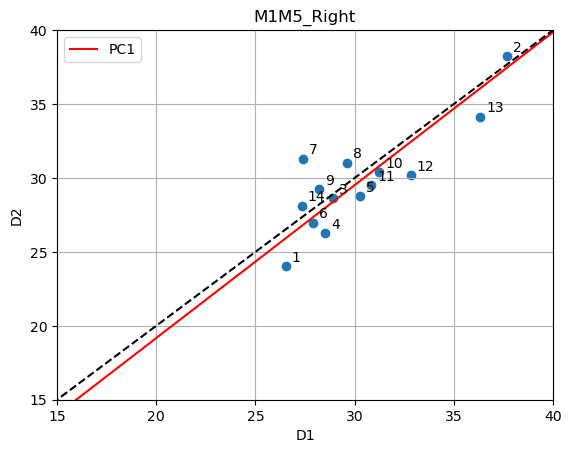

コサイン類似度 : 0.9993255530934544
ベクトル間の角度差 : 2.104436985071035
ユークリッド距離 : 0.03672728975967645
第一主成分軸の分散 : 21.783908171128708
第二主成分軸の分散 : 1.9968327574427305


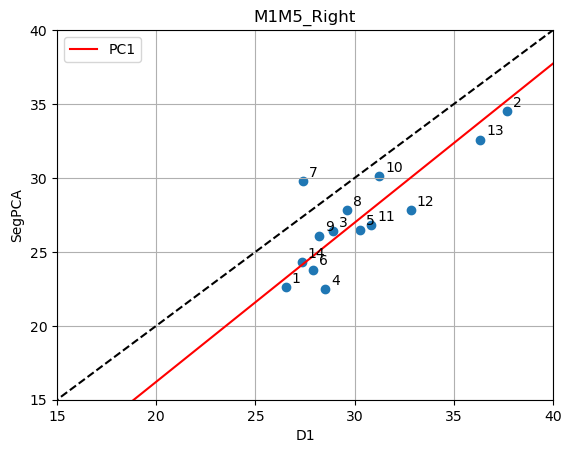

コサイン類似度 : 0.9998565319239686
ベクトル間の角度差 : 0.9705556894547128
ユークリッド距離 : 0.016939189828999897
第一主成分軸の分散 : 23.892457758502992
第二主成分軸の分散 : 0.5498410601783281


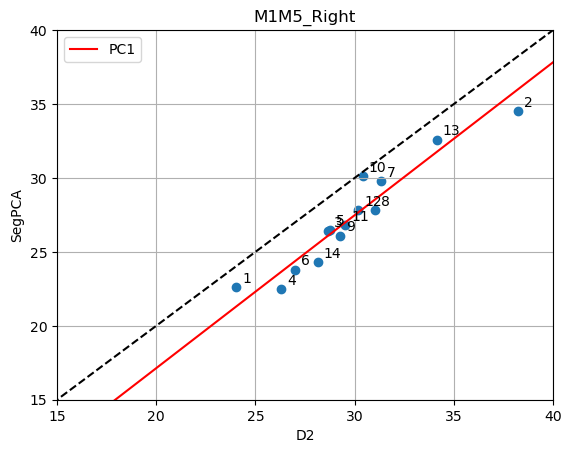

In [18]:
M1M5_D1_R = M1M5_original_data_right["M1M5_D1_R"]
M1M5_D2_R = M1M5_original_data_right["M1M5_D2_R"]
SegPCA_R = M1M5_original_data_right["SegPCA_R"]
process_pca(M1M5_D1_R,M1M5_D2_R,x_label="D1",y_label="D2",title="M1M5_Right",save_path = "assets/M1M5_D1_D2_R.png",mode = "M1M5")
process_pca(M1M5_D1_R,SegPCA_R,x_label="D1",y_label="SegPCA",title="M1M5_Right",save_path = "assets/M1M5_D1_SegPCA_R.png",mode = "M1M5")
process_pca(M1M5_D2_R,SegPCA_R,x_label="D2",y_label="SegPCA",title="M1M5_Right",save_path = "assets/M1M5_D2_SegPCA_R.png",mode = "M1M5")
